In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

demyanovo ru
tautira pf
arraial do cabo br
saint-francois gp
fort nelson ca
avarua ck
tuktoyaktuk ca
marcona pe
albany au
mar del plata ar
warqla dz
gurlan uz
ushuaia ar
avarua ck
tres picos mx
hobyo so
faanui pf
nikolskoye ru
mataura pf
hermanus za
zhezkazgan kz
edd er
rikitea pf
bargal so
ushuaia ar
port hardy ca
grand river south east mu
castro cl
butaritari ki
mahajanga mg
nikolskoye ru
georgetown sh
albany au
hobart au
portland au
taolanaro mg
illoqqortoormiut gl
te anau nz
albany au
hobart au
gigmoto ph
kapaa us
toliary mg
potsdam us
mataura pf
punta arenas cl
provideniya ru
jujuy ar
busselton au
albany au
tocopilla cl
puerto ayora ec
iqaluit ca
ushuaia ar
sumbawa id
upernavik gl
taolanaro mg
saint-philippe re
mahebourg mu
victoria sc
carnarvon au
aksarka ru
punta arenas cl
mahebourg mu
port alfred za
tuy hoa vn
necochea ar
busselton au
vila velha br
podyuga ru
port keats au
enshi cn
liesti ro
busselton au
murnau de
barentsburg sj
albany au
aloleng ph
mataura pf
torbay ca
geraldt

yar-sale ru
faya td
aljezur pt
turkmenabat tm
nanortalik gl
batagay-alyta ru
thompson ca
bonoua ci
atuona pf
purwakarta id
biak id
kodiak us
coihaique cl
ushuaia ar
mataura pf
vanavara ru
port alfred za
benito juarez mx
albany au
port hedland au
ushuaia ar
kapaa us
broome au
cabedelo br
luau ao
ostrovnoy ru
laguna br
kapaa us
albany au
wattegama lk
new norfolk au
dingle ie
shiyan cn
puerto ayora ec
lebu cl
shimoda jp
alyangula au
rikitea pf
samusu ws
mataura pf
nago jp
butaritari ki
champerico gt
kailua us
rikitea pf
flinders au
khatanga ru
tema gh
torbay ca
banda aceh id
klaksvik fo
mataura pf
tasbuget kz
kruisfontein za
bethel us
qaanaaq gl
rikitea pf
bethel us
mataura pf
koboldo ru
beringovskiy ru
vanimo pg
mataura pf
nikolayevka ru
parabel ru
fukuma jp
albany au
ende id
saskylakh ru
ponta delgada pt
hobart au
gillette us
georgetown sh
the valley ai
busselton au
iqaluit ca
punta arenas cl
ceres za
narsaq gl
coahuayana mx
gigmoto ph
qaanaaq gl
ushuaia ar
esperance au
ponte nova br
ma

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [7]:
# Import the request from the library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd385e67d38260b0ab1f43e3219a5a1f


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | demyanovo
Processing Record 2 of Set 1 | tautira
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | fort nelson
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | marcona
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | warqla
City not found. Skipping...
Processing Record 12 of Set 1 | gurlan
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tres picos
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | zhezkazgan
Processing Record 21 of Set 1 | edd
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | bargal
City

Processing Record 35 of Set 4 | kysyl-syr
Processing Record 36 of Set 4 | olinda
Processing Record 37 of Set 4 | pavlogradka
Processing Record 38 of Set 4 | bima
Processing Record 39 of Set 4 | calvia
Processing Record 40 of Set 4 | baykit
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | kolyvan
Processing Record 43 of Set 4 | mercedes
Processing Record 44 of Set 4 | mastung
Processing Record 45 of Set 4 | miraflores
Processing Record 46 of Set 4 | palivere
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | araripe
Processing Record 50 of Set 4 | tayoltita
Processing Record 1 of Set 5 | viedma
Processing Record 2 of Set 5 | napasar
Processing Record 3 of Set 5 | damietta
Processing Record 4 of Set 5 | bandarbeyla
Processing Record 5 of Set 5 | souillac
Processing Record 6 of Set 5 | mwinilunga
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | palm valley
Processing Record 9 of Set 

Processing Record 27 of Set 8 | banda aceh
Processing Record 28 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 29 of Set 8 | kruisfontein
Processing Record 30 of Set 8 | koboldo
City not found. Skipping...
Processing Record 31 of Set 8 | parabel
Processing Record 32 of Set 8 | fukuma
Processing Record 33 of Set 8 | ende
Processing Record 34 of Set 8 | ponta delgada
Processing Record 35 of Set 8 | gillette
Processing Record 36 of Set 8 | the valley
Processing Record 37 of Set 8 | ceres
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | coahuayana
Processing Record 40 of Set 8 | ponte nova
Processing Record 41 of Set 8 | colares
Processing Record 42 of Set 8 | kavaratti
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | urumqi
Processing Record 45 of Set 8 | pacific grove
Processing Record 46 of Set 8 | vostok
Processing Record 47 of Set 8 | havelock
Processing Record 48 of Set 8 | luganville
Processing Record 49 of Set 8 

Processing Record 19 of Set 12 | portree
Processing Record 20 of Set 12 | noumea
Processing Record 21 of Set 12 | mosquera
Processing Record 22 of Set 12 | puerto del rosario
Processing Record 23 of Set 12 | sao raimundo das mangabeiras
Processing Record 24 of Set 12 | los alamos
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | biggar
Processing Record 27 of Set 12 | eyemouth
Processing Record 28 of Set 12 | fare
Processing Record 29 of Set 12 | lar
Processing Record 30 of Set 12 | formoso do araguaia
City not found. Skipping...
Processing Record 31 of Set 12 | taloqan
Processing Record 32 of Set 12 | henties bay
Processing Record 33 of Set 12 | poum
Processing Record 34 of Set 12 | rosetown
Processing Record 35 of Set 12 | peace river
Processing Record 36 of Set 12 | tharad
Processing Record 37 of Set 12 | ozgon
City not found. Skipping...
Processing Record 38 of Set 12 | uwayl
City not found. Skipping...
Processing Record 39 of Set 12 | sri aman
Processin

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Demyanovo,60.3511,47.0842,19.65,94,100,8.10,RU,2022-02-11 00:11:51
1,Tautira,-17.7333,-149.1500,87.82,70,59,11.72,PF,2022-02-11 00:11:51
2,Arraial Do Cabo,-22.9661,-42.0278,73.44,84,100,2.01,BR,2022-02-11 00:11:52
3,Saint-Francois,46.4154,3.9054,47.41,92,100,0.00,FR,2022-02-11 00:11:52
4,Fort Nelson,58.8053,-122.7002,36.99,38,40,20.71,CA,2022-02-11 00:11:52
5,Avarua,-21.2078,-159.7750,84.25,70,40,14.97,CK,2022-02-11 00:02:23
6,Tuktoyaktuk,69.4541,-133.0374,-15.45,96,100,17.69,CA,2022-02-11 00:11:53
7,Albany,42.6001,-73.9662,37.08,82,50,4.68,US,2022-02-11 00:07:43
8,Mar Del Plata,-38.0023,-57.5575,74.08,90,0,24.00,AR,2022-02-11 00:00:29
9,Gurlan,41.8447,60.3919,39.27,57,100,4.76,UZ,2022-02-11 00:11:54


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [16]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Demyanovo,RU,2022-02-11 00:11:51,60.3511,47.0842,19.65,94,100,8.10
1,Tautira,PF,2022-02-11 00:11:51,-17.7333,-149.1500,87.82,70,59,11.72
2,Arraial Do Cabo,BR,2022-02-11 00:11:52,-22.9661,-42.0278,73.44,84,100,2.01
3,Saint-Francois,FR,2022-02-11 00:11:52,46.4154,3.9054,47.41,92,100,0.00
4,Fort Nelson,CA,2022-02-11 00:11:52,58.8053,-122.7002,36.99,38,40,20.71
5,Avarua,CK,2022-02-11 00:02:23,-21.2078,-159.7750,84.25,70,40,14.97
6,Tuktoyaktuk,CA,2022-02-11 00:11:53,69.4541,-133.0374,-15.45,96,100,17.69
7,Albany,US,2022-02-11 00:07:43,42.6001,-73.9662,37.08,82,50,4.68
8,Mar Del Plata,AR,2022-02-11 00:00:29,-38.0023,-57.5575,74.08,90,0,24.00
9,Gurlan,UZ,2022-02-11 00:11:54,41.8447,60.3919,39.27,57,100,4.76


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

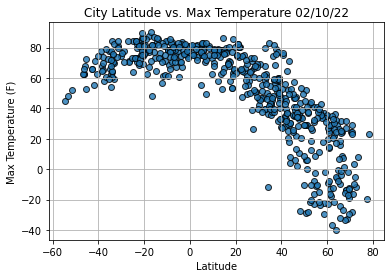

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

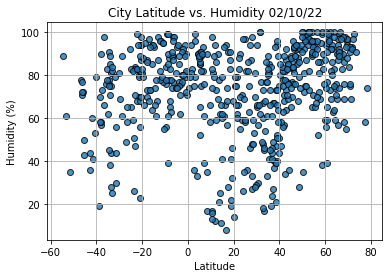

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

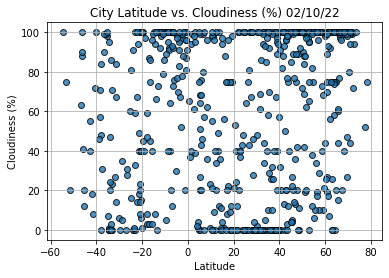

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()